In [1]:
import pandas as pd
import numpy as np
from pyplutchik import plutchik
import itertools

In [2]:
df=pd.read_csv("responses_new.csv", header=0)

In [3]:
df

,Timestamp,What is your Name?,What is your occupation?,Gender,How old are you?,Which speech have you listened to/read?,How much time did you spend reading the speech/hearing the speech?(In Minutes),Did you read or watch the speech?,1. the speech was trying to convey feelings of Anger,2. the speech was trying to convey feelings of Anticipation,3. the speech was trying to convey feelings of Joy,4. the speech was trying to convey feelings of Trust,5. the speech was trying to convey feelings of Fear,6. the speech was trying to convey feelings of Surprise,7. the speech was trying to convey feelings of Sadness,8. the speech was trying to convey feelings of Disgust,What state do you belong to?
0,10/17/2023 22:58:21,NaN,NaN,NaN,NaN,"Martin Luther King Jr.'s ""I Have a Dream"" Spee...",6,NaN,7,5,7,10,4,4,7,8,NaN
1,10/17/2023 23:10:26,NaN,NaN,NaN,NaN,"Martin Luther King Jr.'s ""I Have a Dream"" Spee...",60,NaN,0,1,8,4,1,7,1,0,NaN
2,10/17/2023 23:12:55,NaN,NaN,NaN,NaN,Greta Thunberg's Climate Change Speeches :http...,76,NaN,6,7,3,5,6,2,7,7,NaN
3,10/17/2023 23:28:27,NaN,NaN,NaN,NaN,Nelson Mandela's Inaugural Address (1994):http...,10,NaN,7,10,10,10,1,0,3,0,NaN
4,10/17/2023 23:44:30,NaN,NaN,NaN,NaN,"Martin Luther King Jr.'s ""I Have a Dream"" Spee...",7,NaN,8,8,8,9,3,1,5,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133,2/23/2024 22:36:35,Himanshu Kulkarni,Working professional,Male,50 and above,Steve Jobs' Stanford Commencement Speech (2005...,40,Watch,2,10,9,10,0,5,3,0,Maharashtra
134,2/23/2024 23:03:26,Hitesh,Working professional,Male,50 and above,"Martin Luther King Jr.'s ""I Have a Dream"" Spee...",20,Read,0,7,0,8,0,0,0,0,Haryana
135,2/24/2024 11:01:23,Aakarsh,Student,Male,19-25,"Winston Churchill's ""We Shall Fight on the Bea...",5,Watch,7,6,4,9,3,1,1,6,Delhi
136,2/24/2024 17:50:22,Amit Rajendra Dalvi,Other,Male,50 and above,"Winston Churchill's ""We Shall Fight on the Bea...",60,Read,8,8,8,10,8,5,3,1,Maharashtra


In [ ]:
df=df.loc[

In [4]:
df.dropna(how='all', inplace=True)

In [5]:
df

,Timestamp,What is your Name?,What is your occupation?,Gender,How old are you?,Which speech have you listened to/read?,How much time did you spend reading the speech/hearing the speech?(In Minutes),Did you read or watch the speech?,1. the speech was trying to convey feelings of Anger,2. the speech was trying to convey feelings of Anticipation,3. the speech was trying to convey feelings of Joy,4. the speech was trying to convey feelings of Trust,5. the speech was trying to convey feelings of Fear,6. the speech was trying to convey feelings of Surprise,7. the speech was trying to convey feelings of Sadness,8. the speech was trying to convey feelings of Disgust,What state do you belong to?
0,10/17/2023 22:58:21,NaN,NaN,NaN,NaN,"Martin Luther King Jr.'s ""I Have a Dream"" Spee...",6,NaN,7,5,7,10,4,4,7,8,NaN
1,10/17/2023 23:10:26,NaN,NaN,NaN,NaN,"Martin Luther King Jr.'s ""I Have a Dream"" Spee...",60,NaN,0,1,8,4,1,7,1,0,NaN
2,10/17/2023 23:12:55,NaN,NaN,NaN,NaN,Greta Thunberg's Climate Change Speeches :http...,76,NaN,6,7,3,5,6,2,7,7,NaN
3,10/17/2023 23:28:27,NaN,NaN,NaN,NaN,Nelson Mandela's Inaugural Address (1994):http...,10,NaN,7,10,10,10,1,0,3,0,NaN
4,10/17/2023 23:44:30,NaN,NaN,NaN,NaN,"Martin Luther King Jr.'s ""I Have a Dream"" Spee...",7,NaN,8,8,8,9,3,1,5,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133,2/23/2024 22:36:35,Himanshu Kulkarni,Working professional,Male,50 and above,Steve Jobs' Stanford Commencement Speech (2005...,40,Watch,2,10,9,10,0,5,3,0,Maharashtra
134,2/23/2024 23:03:26,Hitesh,Working professional,Male,50 and above,"Martin Luther King Jr.'s ""I Have a Dream"" Spee...",20,Read,0,7,0,8,0,0,0,0,Haryana
135,2/24/2024 11:01:23,Aakarsh,Student,Male,19-25,"Winston Churchill's ""We Shall Fight on the Bea...",5,Watch,7,6,4,9,3,1,1,6,Delhi
136,2/24/2024 17:50:22,Amit Rajendra Dalvi,Other,Male,50 and above,"Winston Churchill's ""We Shall Fight on the Bea...",60,Read,8,8,8,10,8,5,3,1,Maharashtra


In [6]:
dict = {'Timestamp': 'timestamp',
        'Which speech have you listened to/read?': 'speech_no',
        'How much time did you spend reading the speech/hearing the speech?(In Minutes)': 'time_spent',
    '1. the speech was trying to convey feelings of Anger': 'anger',
        '2. the speech was trying to convey feelings of Anticipation': 'anticipation',
        '3. the speech was trying to convey feelings of Joy': 'joy',
       '4. the speech was trying to convey feelings of Trust': 'trust',
       '5. the speech was trying to convey feelings of Fear': 'fear',
       '6. the speech was trying to convey feelings of Surprise': 'surprise',
       '7. the speech was trying to convey feelings of Sadness': 'sadness',
       '8. the speech was trying to convey feelings of Disgust': 'disgust'}

In [7]:
df.rename(columns=dict,
          inplace=True)

In [8]:
df

,timestamp,What is your Name?,What is your occupation?,Gender,How old are you?,speech_no,time_spent,Did you read or watch the speech?,anger,anticipation,joy,trust,fear,surprise,sadness,disgust,What state do you belong to?
0,10/17/2023 22:58:21,NaN,NaN,NaN,NaN,"Martin Luther King Jr.'s ""I Have a Dream"" Spee...",6,NaN,7,5,7,10,4,4,7,8,NaN
1,10/17/2023 23:10:26,NaN,NaN,NaN,NaN,"Martin Luther King Jr.'s ""I Have a Dream"" Spee...",60,NaN,0,1,8,4,1,7,1,0,NaN
2,10/17/2023 23:12:55,NaN,NaN,NaN,NaN,Greta Thunberg's Climate Change Speeches :http...,76,NaN,6,7,3,5,6,2,7,7,NaN
3,10/17/2023 23:28:27,NaN,NaN,NaN,NaN,Nelson Mandela's Inaugural Address (1994):http...,10,NaN,7,10,10,10,1,0,3,0,NaN
4,10/17/2023 23:44:30,NaN,NaN,NaN,NaN,"Martin Luther King Jr.'s ""I Have a Dream"" Spee...",7,NaN,8,8,8,9,3,1,5,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133,2/23/2024 22:36:35,Himanshu Kulkarni,Working professional,Male,50 and above,Steve Jobs' Stanford Commencement Speech (2005...,40,Watch,2,10,9,10,0,5,3,0,Maharashtra
134,2/23/2024 23:03:26,Hitesh,Working professional,Male,50 and above,"Martin Luther King Jr.'s ""I Have a Dream"" Spee...",20,Read,0,7,0,8,0,0,0,0,Haryana
135,2/24/2024 11:01:23,Aakarsh,Student,Male,19-25,"Winston Churchill's ""We Shall Fight on the Bea...",5,Watch,7,6,4,9,3,1,1,6,Delhi
136,2/24/2024 17:50:22,Amit Rajendra Dalvi,Other,Male,50 and above,"Winston Churchill's ""We Shall Fight on the Bea...",60,Read,8,8,8,10,8,5,3,1,Maharashtra


In [9]:
cleanup_nums = {'''Winston Churchill's "We Shall Fight on the Beaches" Speech (1940):https://winstonchurchill.org/resources/speeches/1940-the-finest-hour/we-shall-fight-on-the-beaches/ Video:https://www.youtube.com/watch?v=skrdyoabmgA''':"1",
'''John F. Kennedy's Inaugural Address (1961):https://www.archives.gov/milestone-documents/president-john-f-kennedys-inaugural-address Video: https://www.youtube.com/watch?v=PEC1C4p0k3E''':"2",
'''Nelson Mandela's Inaugural Address (1994):https://www.africa.upenn.edu/Articles_Gen/Inaugural_Speech_17984.html Video: https://www.youtube.com/watch?v=pJiXu4q__VU''':"3",
'''Steve Jobs' Stanford Commencement Speech (2005):https://academyatthelakes.org/wp-content/uploads/2016/02/SteveJobsatStanfordUniversityExcerpts.pdf Video: https://www.youtube.com/watch?v=UF8uR6Z6KLc''':"4",
'''Malala Yousafzai's United Nations Speech (2013):https://awpc.cattcenter.iastate.edu/2018/03/05/un-speech-on-youth-education-july-12-2013/ Video:https://www.youtube.com/watch?v=5SClmL43dTo''':"5",
'''Elie Wiesel's Nobel Peace Prize Acceptance Speech (1986):https://sfponline.org/Uploads/66/ElieWieselspeech.pdf''':"6",
'''Greta Thunberg's Climate Change Speeches :https://www.npr.org/2019/09/23/763452863/transcript-greta-thunbergs-speech-at-the-u-n-climate-action-summit#:~:text=%22The%20popular%20idea%20of%20cutting,may%20be%20acceptable%20to%20you Video: https://www.youtube.com/watch?v=KAJsdgTPJpU''':"7",
'''Barack Obama's Farewell Address (2017):https://www.politico.com/story/2017/01/full-text-obama-farewell-speech-transcript-233916''':"8",
'''Aung San Suu Kyi's Nobel Lecture (2012):https://www.nobelprize.org/prizes/peace/1991/kyi/26193-aung-san-suu-kyi-nobel-lecture-english/ Video: https://www.youtube.com/watch?v=NihXxEDFIBM''':"9",
'''Martin Luther King Jr.'s "I Have a Dream" Speech (1963):https://www.npr.org/2010/01/18/122701268/i-have-a-dream-speech-in-its-entirety Video: https://www.youtube.com/watch?v=vP4iY1TtS3s''':"10",
               '''Donald Trump Speech “Save America” Rally January 6: https://www.rev.com/blog/transcripts/donald-trump-speech-save-america-rally-transcript-january-6 Video :https://www.youtube.com/watch?v=mh3cbd7niTQ''':"11",
               '''President Biden's Jan. 6 speech : https://www.npr.org/2022/01/06/1070931178/jan-6-anniversary-biden-speech-transcript Video: Present on the same website.''':"12",
               '''SPEECH BY CHANCELLOR ADOLF HITLER, AT BERLIN SPORTS PALACE : https://sites.temple.edu/immerman/text-of-speech-by-chancellor-adolf-hitler-at-berlin-sports-palace/''':"13"}

In [13]:
df=df.iloc[:,[0,5,6,8,9,10,11,12,13,14,15]]

In [14]:
df=df.replace(cleanup_nums)
df

,timestamp,speech_no,time_spent,anger,anticipation,joy,trust,fear,surprise,sadness,disgust
0,10/17/2023 22:58:21,10,6,7,5,7,10,4,4,7,8
1,10/17/2023 23:10:26,10,60,0,1,8,4,1,7,1,0
2,10/17/2023 23:12:55,7,76,6,7,3,5,6,2,7,7
3,10/17/2023 23:28:27,3,10,7,10,10,10,1,0,3,0
4,10/17/2023 23:44:30,10,7,8,8,8,9,3,1,5,1
...,...,...,...,...,...,...,...,...,...,...,...
133,2/23/2024 22:36:35,4,40,2,10,9,10,0,5,3,0
134,2/23/2024 23:03:26,10,20,0,7,0,8,0,0,0,0
135,2/24/2024 11:01:23,1,5,7,6,4,9,3,1,1,6
136,2/24/2024 17:50:22,1,60,8,8,8,10,8,5,3,1


In [15]:
cols_to_average = df.columns[-8:]

In [16]:
df_grouped = df.groupby('speech_no')[cols_to_average].mean()

In [17]:
df_grouped

,anger,anticipation,joy,trust,fear,surprise,sadness,disgust
speech_no,,,,,,,,
1,6.941176,7.117647,2.176471,8.058824,2.588235,2.352941,2.529412,1.588235
10,4.681818,7.136364,5.181818,8.227273,2.454545,2.545455,5.136364,3.409091
11,1.000000,3.500000,5.500000,6.000000,3.500000,1.500000,1.000000,2.500000
12,5.000000,5.000000,5.000000,8.000000,5.000000,0.000000,5.000000,6.000000
13,7.000000,1.500000,2.000000,1.000000,2.000000,4.500000,2.000000,4.500000
2,0.750000,6.000000,7.833333,9.000000,1.333333,2.750000,0.500000,0.250000
3,4.111111,8.777778,8.444444,9.444444,1.666667,3.111111,3.000000,0.666667
4,1.578947,6.000000,6.000000,6.315789,3.263158,3.684211,4.052632,1.000000
5,3.785714,4.642857,2.928571,6.000000,4.357143,2.928571,7.571429,4.857143


In [18]:
df_grouped.drop(df_grouped.tail(3).index,
        inplace = True)

In [19]:
df_grouped

,anger,anticipation,joy,trust,fear,surprise,sadness,disgust
speech_no,,,,,,,,
1,6.941176,7.117647,2.176471,8.058824,2.588235,2.352941,2.529412,1.588235
10,4.681818,7.136364,5.181818,8.227273,2.454545,2.545455,5.136364,3.409091
11,1.000000,3.500000,5.500000,6.000000,3.500000,1.500000,1.000000,2.500000
12,5.000000,5.000000,5.000000,8.000000,5.000000,0.000000,5.000000,6.000000
13,7.000000,1.500000,2.000000,1.000000,2.000000,4.500000,2.000000,4.500000
2,0.750000,6.000000,7.833333,9.000000,1.333333,2.750000,0.500000,0.250000
3,4.111111,8.777778,8.444444,9.444444,1.666667,3.111111,3.000000,0.666667
4,1.578947,6.000000,6.000000,6.315789,3.263158,3.684211,4.052632,1.000000
5,3.785714,4.642857,2.928571,6.000000,4.357143,2.928571,7.571429,4.857143


In [20]:
cols_to_divide = df_grouped.columns[-8:]

In [21]:
df_grouped[cols_to_divide] = df_grouped[cols_to_divide] / 10

In [22]:
records=df_grouped.to_dict(orient='records')

In [23]:
records

[{'anger': 0.6941176470588235,
  'anticipation': 0.7117647058823529,
  'joy': 0.2176470588235294,
  'trust': 0.8058823529411765,
  'fear': 0.25882352941176473,
  'surprise': 0.23529411764705882,
  'sadness': 0.2529411764705882,
  'disgust': 0.1588235294117647},
 {'anger': 0.46818181818181814,
  'anticipation': 0.7136363636363636,
  'joy': 0.5181818181818182,
  'trust': 0.8227272727272726,
  'fear': 0.24545454545454545,
  'surprise': 0.2545454545454545,
  'sadness': 0.5136363636363637,
  'disgust': 0.34090909090909094},
 {'anger': 0.1,
  'anticipation': 0.35,
  'joy': 0.55,
  'trust': 0.6,
  'fear': 0.35,
  'surprise': 0.15,
  'sadness': 0.1,
  'disgust': 0.25},
 {'anger': 0.5,
  'anticipation': 0.5,
  'joy': 0.5,
  'trust': 0.8,
  'fear': 0.5,
  'surprise': 0.0,
  'sadness': 0.5,
  'disgust': 0.6},
 {'anger': 0.7,
  'anticipation': 0.15,
  'joy': 0.2,
  'trust': 0.1,
  'fear': 0.2,
  'surprise': 0.45,
  'sadness': 0.2,
  'disgust': 0.45},
 {'anger': 0.075,
  'anticipation': 0.6,
  'joy

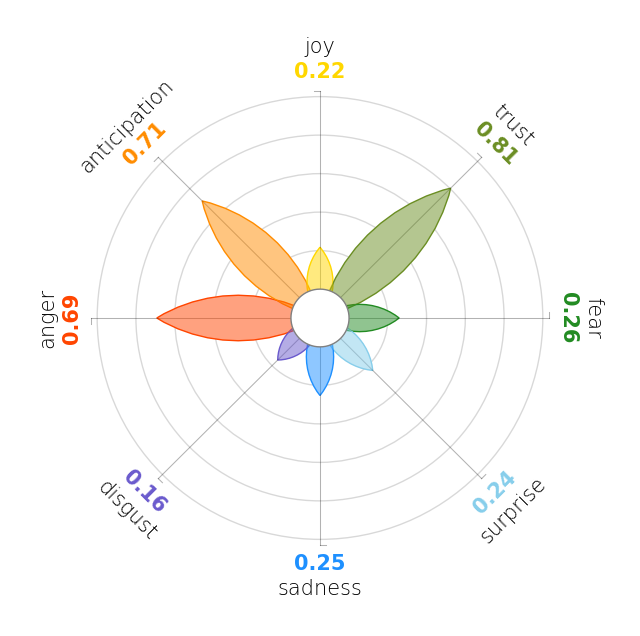

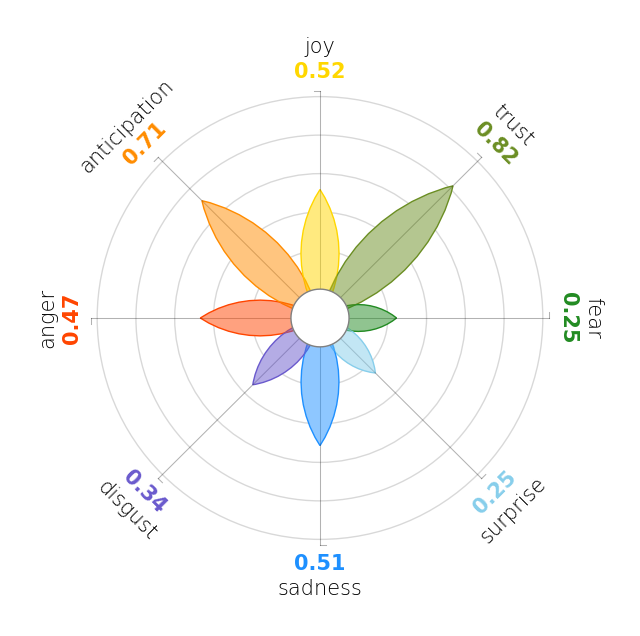

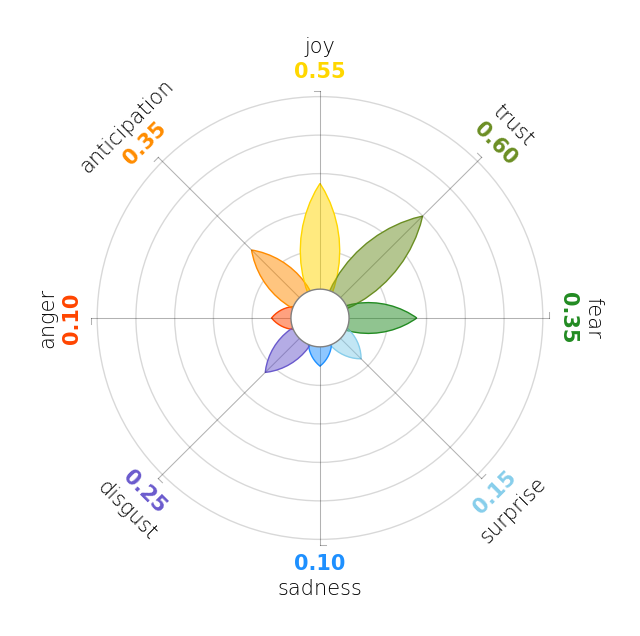

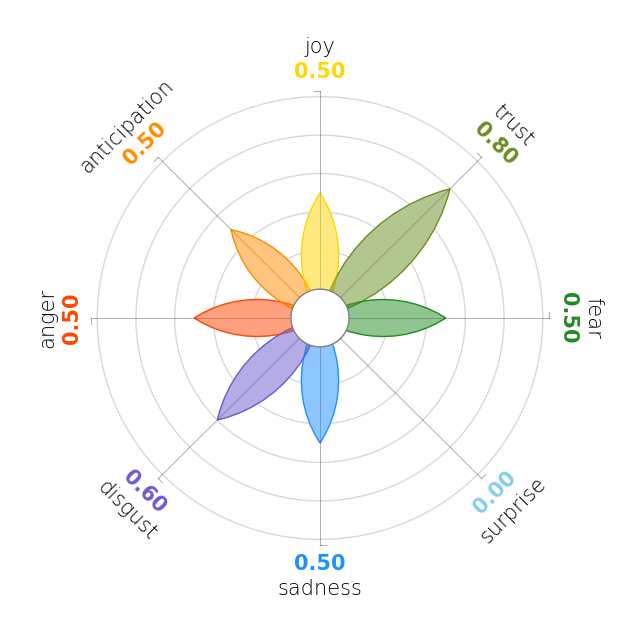

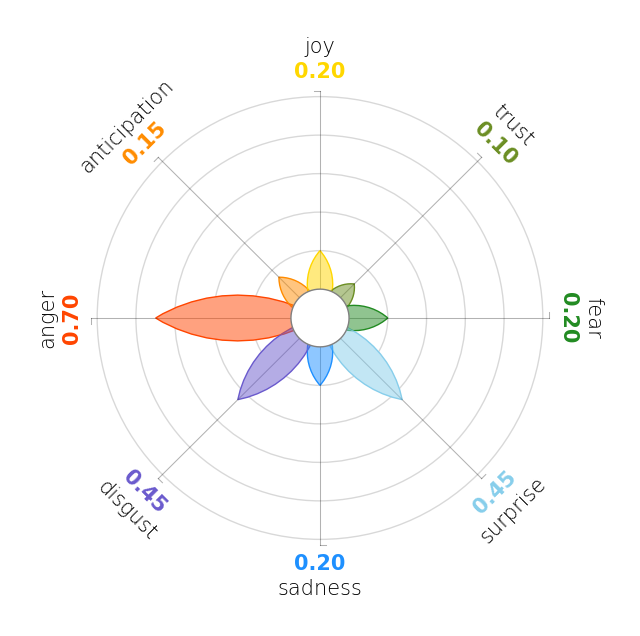

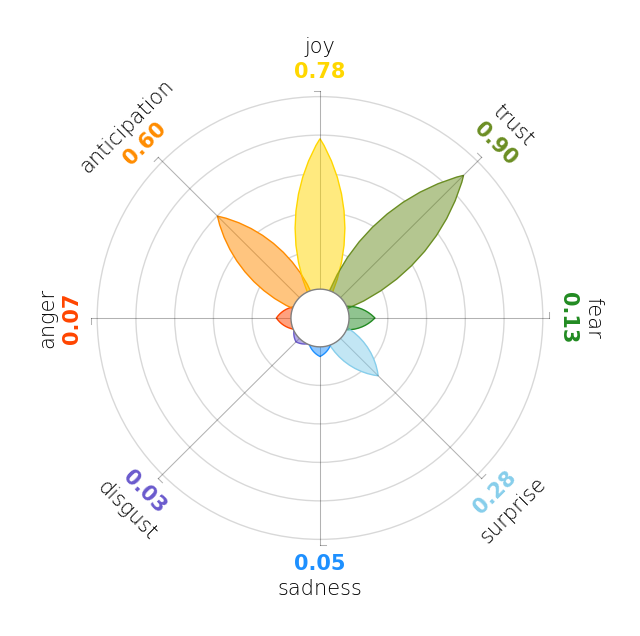

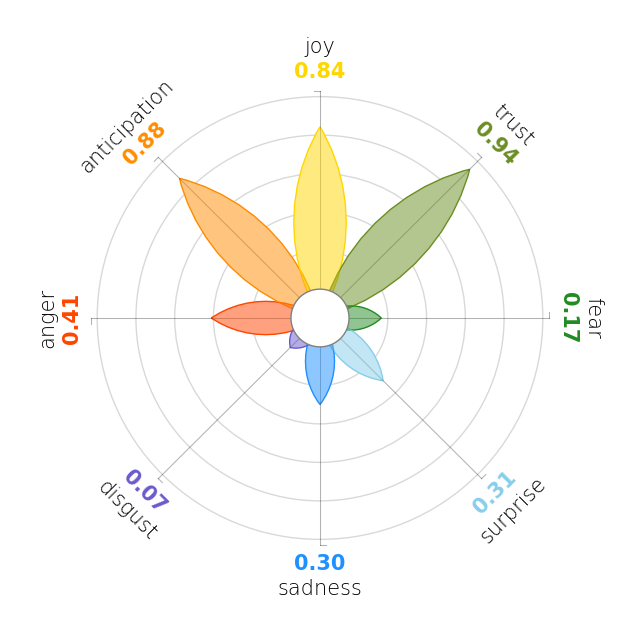

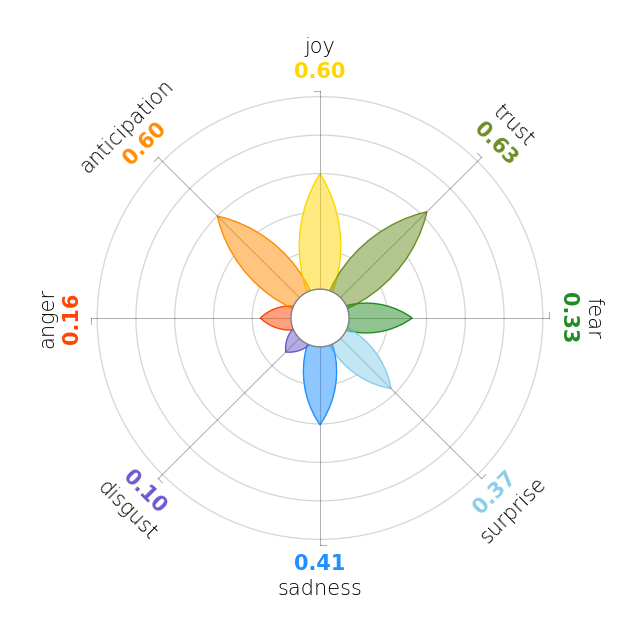

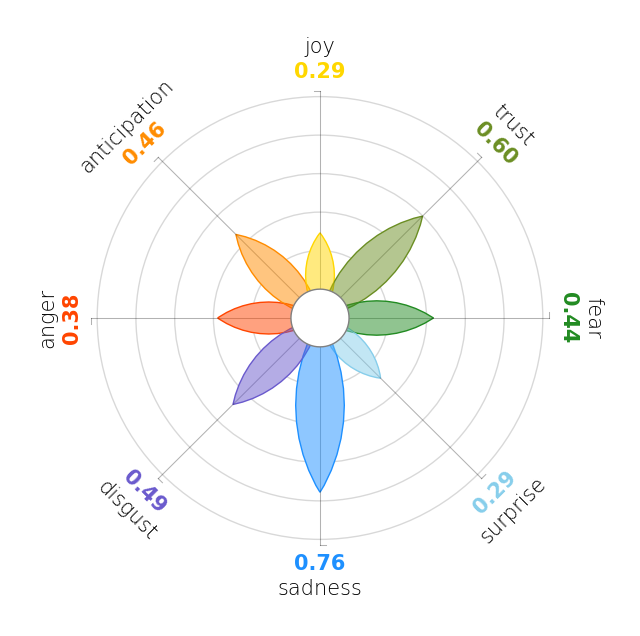

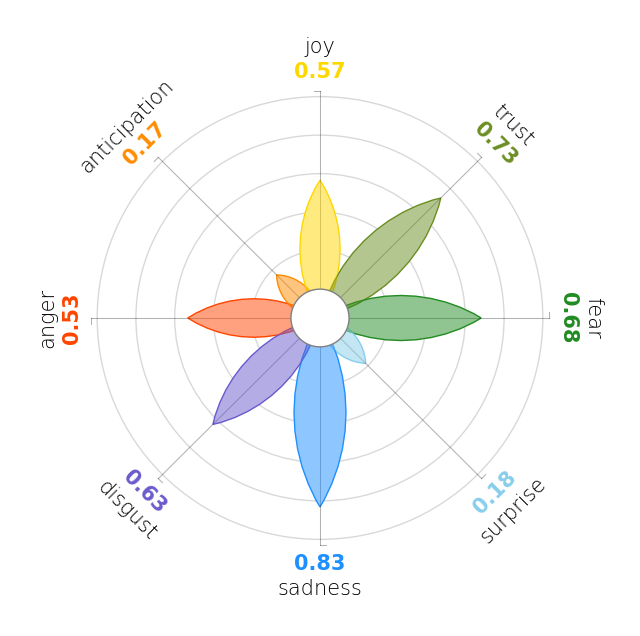

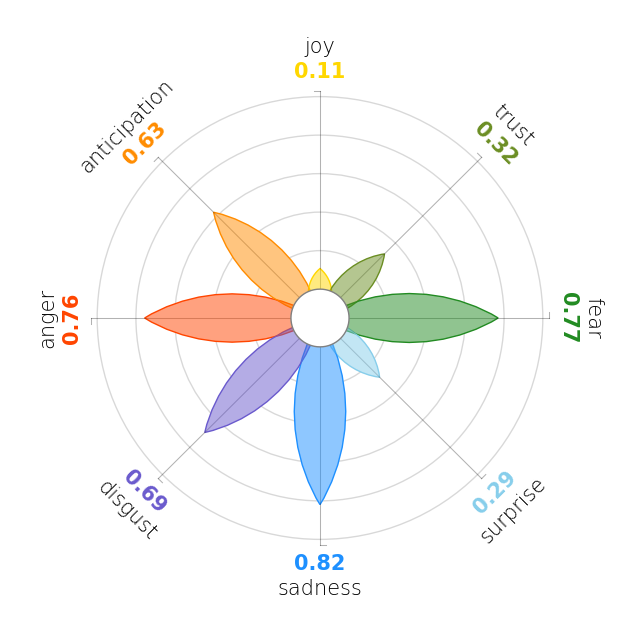

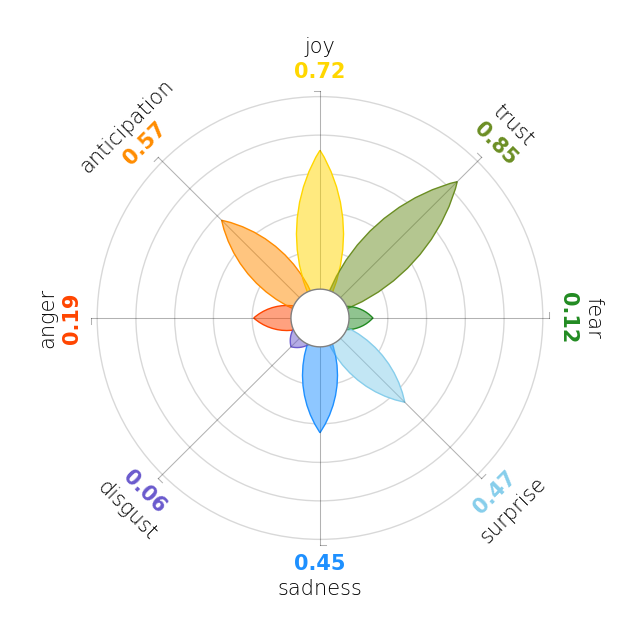

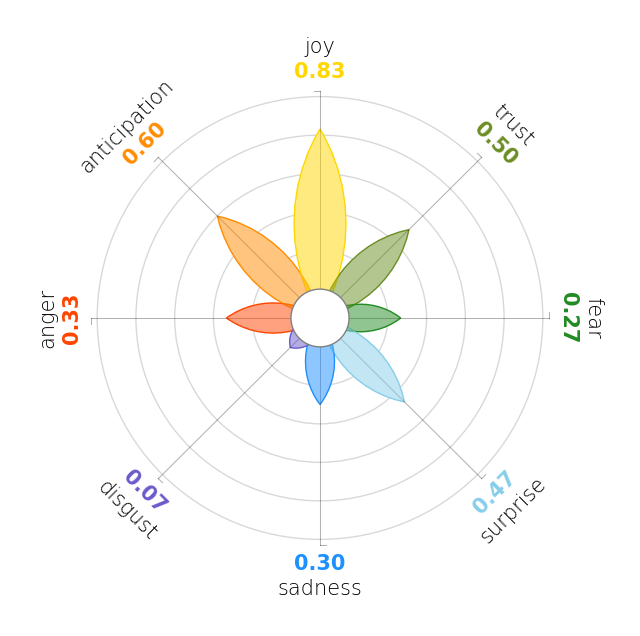

In [24]:
for record in records:
    plutchik(record)

In [26]:
#ignore this for now
primary_dyads = {('joy','trust'): 'love', ('fear','trust'): 'submission', ('fear','surprise'): 'alarm', 
                 ('sadness','surprise'): 'disappointment', ('disgust','sadness'): 'remorse', ('anger','disgust'): 'contempt', 
                 ('anger','anticipation'): 'aggressiveness', ('anticipation','joy'): 'optimism'}

secondary_dyads = {('anticipation','trust'):'hope',('fear','joy'):'guilt',('surprise','trust'):'curiosity',('fear','sadness'):'dispair',
                   ('anger','sadness'):'envy',('anticipation','disgust'):'cynism',('anger','joy'):'pride'}

tertiary_dyads = {('anger','trust'):'dominance',('anticipation','fear'):'anxiety',('joy','surprise'):'delight',
                  ('sadness','trust'):'sentimentality',('disgust','fear'):'shame',('anger','surprise'):'outrage',
                  ('anticipation','sadness'):'pessimism',('disgust','joy'):'morbidness'}

opposite_dyads = {('joy','sadness'):'bittersweetness',('disgust','trust'):'ambivalence',('anger','fear'):'frozenness',
                  ('anticipation','surprise'):'confusion'}
plutchik_wheel = ['joy', 'trust', 'fear', 'surprise', 'sadness', 'disgust', 'anger', 'anticipation']

In [27]:
#ignore
def find_state(emotion1, emotion2):
    if emotion1<emotion2:
        emo1=emotion1
        emo2=emotion2
    else:
        emo1=emotion2
        emo2=emotion1
    index1=plutchik_wheel.index(emo1)
    index2=plutchik_wheel.index(emo2)
    distance=abs(index1-index2) % 8

    if distance>4:
        distance=8-distance
    if distance==1:
        print(primary_dyads[(emo1, emo2)])
    elif distance==2:
        print(secondary_dyads[(emo1, emo2)])
    elif distance==3:
        print(tertiary_dyads[(emo1, emo2)])
    elif distance==4:
        print(opposite_dyads[(emo1, emo2)])
    else:
        print("error")

In [28]:
# top_two_emotions = sorted(records[0].items(), key=lambda x: x[1], reverse=True)[:2]
for record in records:
    top_two_emotions = sorted(record.items(), key=lambda x: x[1], reverse=True)[:2]
    emotion1=top_two_emotions[0][0]
    emotion2=top_two_emotions[1][0]
    find_state(emotion1, emotion2)

hope
hope
love
ambivalence
outrage
love
hope
hope
sentimentality
sentimentality
dispair
love
optimism


In [32]:
for record in records:
    top_two_emotions = sorted(record.items(), key=lambda x: x[1], reverse=True)[:2]
    print(top_two_emotions)

[('trust', 0.8058823529411765), ('anticipation', 0.7117647058823529)]
[('trust', 0.8227272727272726), ('anticipation', 0.7136363636363636)]
[('trust', 0.6), ('joy', 0.55)]
[('trust', 0.8), ('disgust', 0.6)]
[('anger', 0.7), ('surprise', 0.45)]
[('trust', 0.9), ('joy', 0.7833333333333333)]
[('trust', 0.9444444444444444), ('anticipation', 0.8777777777777779)]
[('trust', 0.631578947368421), ('anticipation', 0.6)]
[('sadness', 0.7571428571428571), ('trust', 0.6)]
[('sadness', 0.8333333333333334), ('trust', 0.7333333333333333)]
[('sadness', 0.8214285714285714), ('fear', 0.7714285714285715)]
[('trust', 0.8538461538461538), ('joy', 0.7230769230769231)]
[('joy', 0.8333333333333334), ('anticipation', 0.6)]
